In [1]:
import pandas as pd
import matplotlib as plt
import sqlite3
import os
import seaborn as sns

In [2]:
#retriing table names from data frame
im_path = r"C:\Users\HP\Desktop\moringa\PHASE1_PROJECT\im.db\im.db"

conn = sqlite3.connect(im_path)
cursor = conn.cursor()

table_name_query = """ SELECT name
                       AS 'Table Names' 
                       FROM sqlite_master 
                       WHERE type='table';
                       """

table_names = pd.read_sql(table_name_query, conn)

print(table_names)

     Table Names
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [3]:
q = """SELECT *
       FROM directors;
    """
df = pd.read_sql(q, conn)

print(df.head())

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502


In [3]:
# marging the movie mudgets in csv file and  cleaning them up
budget_one = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
budget_two = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\bom.movie_gross.csv\\bom.movie_gross.csv")


In [4]:
budget_one.head()
budget_one.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [6]:
print(budget_one.columns)

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [5]:
budget_one

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
print(budget_two.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [7]:
budget_two.drop(columns=["studio", "year"], inplace=True)
budget_two

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000
1,Alice in Wonderland (2010),334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000
3,Inception,292600000.0,535700000
4,Shrek Forever After,238700000.0,513900000
...,...,...,...
3382,The Quake,6200.0,NaN
3383,Edward II (2018 re-release),4800.0,NaN
3384,El Pacto,2500.0,NaN
3385,The Swan,2400.0,NaN


In [8]:
budget_two.columns = ['movie', 'domestic_gross', 'worldwide_gross']

# Print the updated DataFrame
print(budget_two)

                                            movie  domestic_gross  \
0                                     Toy Story 3     415000000.0   
1                      Alice in Wonderland (2010)     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     296000000.0   
3                                       Inception     292600000.0   
4                             Shrek Forever After     238700000.0   
...                                           ...             ...   
3382                                    The Quake          6200.0   
3383                  Edward II (2018 re-release)          4800.0   
3384                                     El Pacto          2500.0   
3385                                     The Swan          2400.0   
3386                            An Actor Prepares          1700.0   

     worldwide_gross  
0          652000000  
1          691300000  
2          664300000  
3          535700000  
4          513900000  
...              ...  
3382      

In [9]:
merged_revenue=pd.concat([budget_one, budget_two])
merged_revenue

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,NaN,6200.0,NaN
3383,NaN,NaN,Edward II (2018 re-release),NaN,4800.0,NaN
3384,NaN,NaN,El Pacto,NaN,2500.0,NaN
3385,NaN,NaN,The Swan,NaN,2400.0,NaN


In [10]:
merged_revenue.drop_duplicates()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3.0,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
3382,NaN,NaN,The Quake,NaN,6200.0,NaN
3383,NaN,NaN,Edward II (2018 re-release),NaN,4800.0,NaN
3384,NaN,NaN,El Pacto,NaN,2500.0,NaN
3385,NaN,NaN,The Swan,NaN,2400.0,NaN


In [12]:
merged_revenue['domestic_gross'] = pd.to_numeric(merged_revenue['domestic_gross'], errors='coerce')


In [13]:
merged_revenue['domestic_gross'].mean()

28745845.06698422

In [15]:
median_value=merged_revenue['domestic_gross'].median()
median_value

1400000.0

In [16]:
merged_revenue['domestic_gross'].max()

936700000.0

In [ ]:
merged_revenue['domestic_gross'].describe()

In [18]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].fillna(median_value)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [20]:
# im trying to remove the /$ signs 
merged_revenue['worldwide_gross'] = pd.to_numeric(merged_revenue['worldwide_gross'].replace('[\$,]', '', regex=True), errors='coerce')


In [21]:
median=merged_revenue['worldwide_gross'].median()

In [22]:
merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].fillna(median)

In [ ]:
merged_revenue['worldwide_gross'].describe()

In [ ]:
m1 = pd.read_csv("C:\\Users\\HP\\Desktop\\moringa\\PHASE1_PROJECT\\tn.movie_budgets.csv\\tn.movie_budgets.csv")
m1

In [ ]:

production_budget = m1['production_budget']

production_budget = pd.to_numeric(production_budget.replace('[\$,]', '', regex=True), errors='coerce')
production_budget

In [ ]:
Release_year = m1['release_date']
Release_year

In [46]:
merged_revenue['Release_year'] = Release_year

In [ ]:
production_budget.describe()

In [ ]:
merged_revenue
pd.set_option('display.float_format', '{:.2f}'.format)
merged_revenue

In [ ]:
merged_revenue['production_budget'] = production_budget
merged_revenue

In [ ]:
merged_revenue['production_budget'].describe()

In [33]:
merged_revenue['production_budget'] = pd.to_numeric(merged_revenue['production_budget'].replace('[\$,]', '', regex=True), errors='coerce')

In [34]:
median_production=merged_revenue['production_budget'].median()

In [35]:
merged_revenue['production_budget'] = merged_revenue['production_budget'].fillna(median_production)

In [ ]:
merged_revenue['Total_revenue'] = merged_revenue['domestic_gross'] + merged_revenue['worldwide_gross']
merged_revenue['Total_revenue'] 

In [ ]:
merged_revenue['ROI'] = ((merged_revenue['Total_revenue'] - merged_revenue['production_budget']) / merged_revenue['production_budget']) * 100
merged_revenue['ROI']

In [38]:
merged_revenue['domestic_gross'] = merged_revenue['domestic_gross'].round().astype(int)

merged_revenue['worldwide_gross'] = merged_revenue['worldwide_gross'].round().astype(int)

In [ ]:
merged_revenue

In [40]:
import matplotlib.pyplot as plt

# Check if 'figure' is overwritten
print(plt.figure)

<function figure at 0x000001FE83436560>


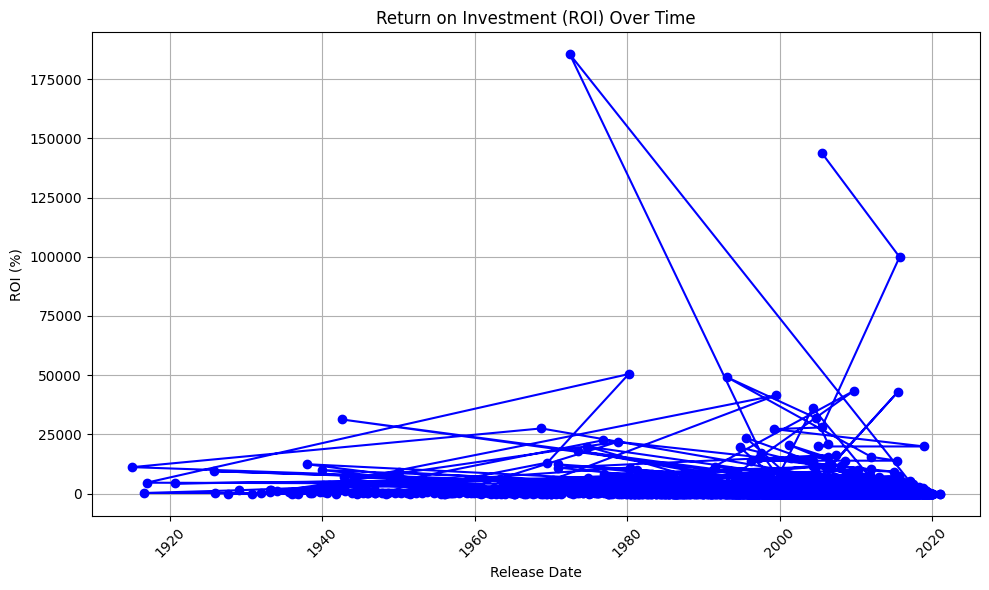

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

merged_revenue['release_date'] = pd.to_datetime(merged_revenue['release_date'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(merged_revenue['release_date'], merged_revenue['ROI'], marker='o', linestyle='-', color='b')
plt.title('Return on Investment (ROI) Over Time')
plt.xlabel('Release Date')
plt.ylabel('ROI (%)')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


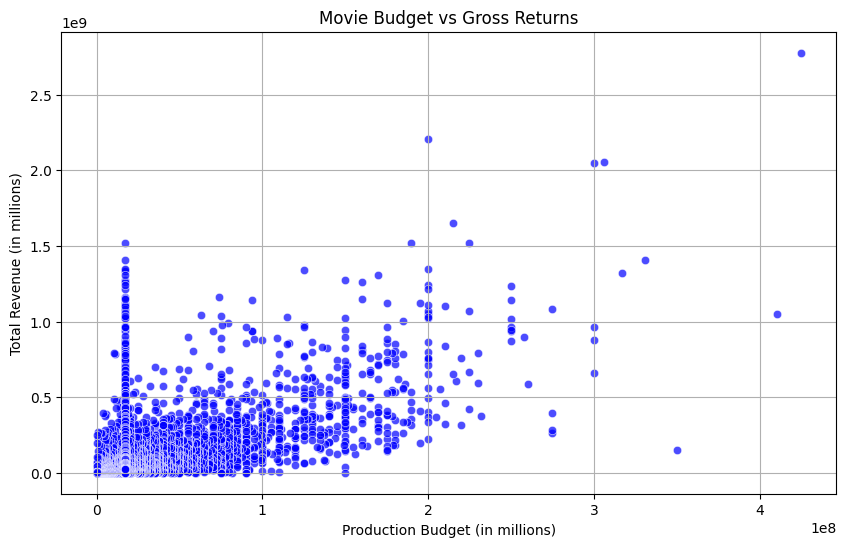

In [54]:
# trying to figure out the relationship between movie budget and total revenue returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='Total_revenue', data=merged_revenue, color='blue', alpha=0.7)
plt.title('Movie Budget vs Gross Returns')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


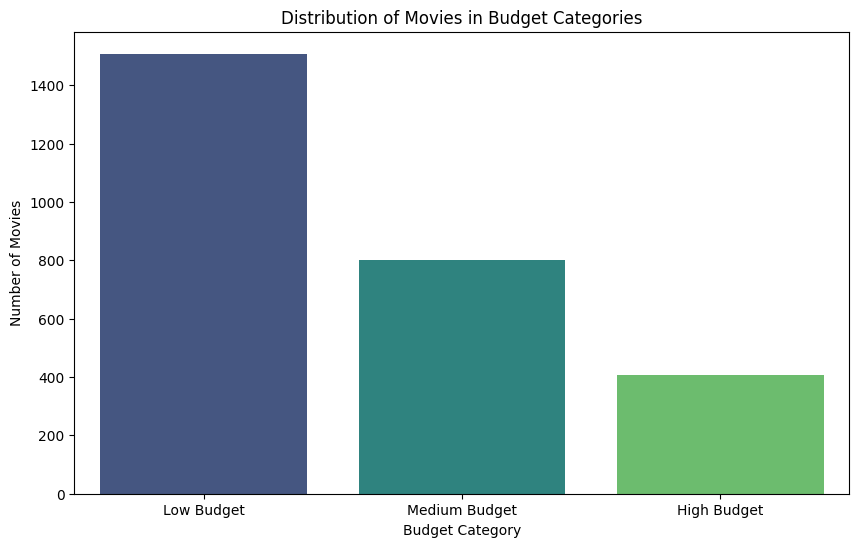

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


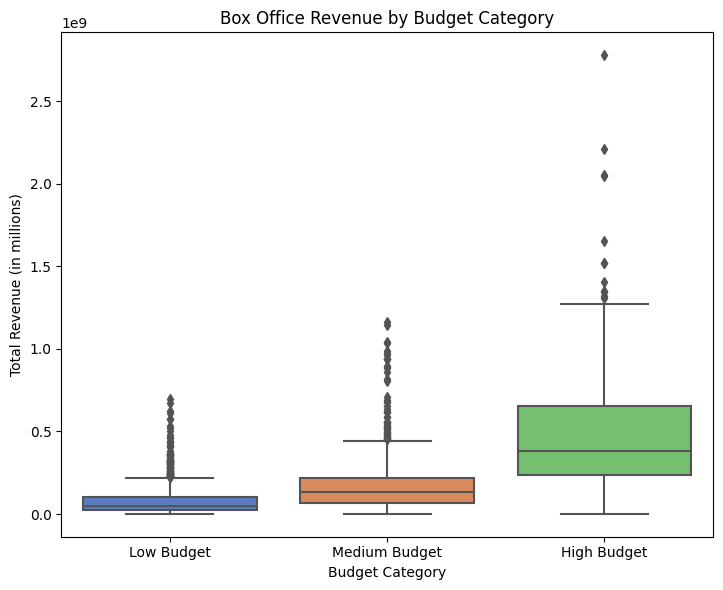

In [62]:
#  budget categories by definations
budget_bins = [20000000, 50000000, 100000000, float('inf')]  
budget_labels = ['Low Budget', 'Medium Budget', 'High Budget']

# Created a new column 'Budget_Category' based on budget ranges
merged_revenue['Budget_Category'] = pd.cut(merged_revenue['production_budget'], bins=budget_bins, labels=budget_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Budget_Category', data=merged_revenue, palette='viridis')
plt.title('Distribution of Movies in Budget Categories')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')
plt.show()

# analysis on revenue and reviews by budget category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Budget_Category', y='Total_revenue', data=merged_revenue, palette='muted')
plt.title('Box Office Revenue by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Total Revenue (in millions)')

plt.tight_layout()
plt.show()

In [ ]:
top_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).head(10)
top_gross_return 


In [ ]:
low_gross_return = merged_revenue.sort_values(by='Total_revenue', ascending=False).tail(10)
low_gross_return

In [75]:
# correlation between production cost and revenue return
correlation_budget_revenue = merged_revenue['production_budget'].corr(merged_revenue['Total_revenue'])
correlation_budget_revenue

0.5964429843069146

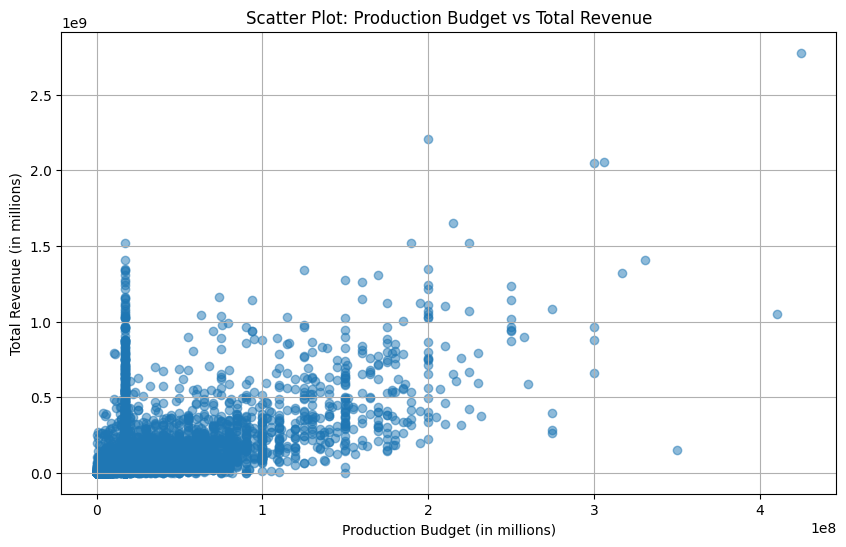

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_revenue['production_budget'], merged_revenue['Total_revenue'], alpha=0.5)
plt.title('Scatter Plot: Production Budget vs Total Revenue')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Total Revenue (in millions)')
plt.grid(True)
plt.show()

# positive correlation